## Prawdopodobieństwo blokady w sieciach z jedną usługą

Importowanie bibliotek i funkcji

In [26]:
import numpy as np
from scipy.special import factorial, comb, beta, gamma
import matplotlib.pyplot as plt
import seaborn as sns

Tworzenie listy wartości 'a', ustalenie stałej wartości V

In [27]:
a_list = np.arange(0.2, 1.21, 0.1)
V = 10
a_list

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2])

Funkcja do obliczenia Prawdopodobieństawa Blokady i Strat modelu Erlanga

In [28]:
def oblicz_E(a_list, V):
    wyniki = []
    for a in a_list:
        A = a*V
        licznik = (A**V)/factorial(V, exact=False)
        mianownik = np.sum([(A**k) / factorial(k, exact=False) for k in range(V+1)])
        
        if mianownik == 0:
            E = 0.0 if licznik == 0 else np.inf
        else:
            E = licznik/mianownik
        wyniki.append(E)
    return wyniki

Podgląd wyników

In [29]:
wyniki_E = oblicz_E(a_list, V)
wyniki_E

[np.float64(3.819016794126353e-05),
 np.float64(0.0008103880858500023),
 np.float64(0.005307548873895186),
 np.float64(0.01838457033664815),
 np.float64(0.04314183841043929),
 np.float64(0.07874088296957034),
 np.float64(0.12166106425295169),
 np.float64(0.16796322629158655),
 np.float64(0.21458234310734736),
 np.float64(0.2595803278680201),
 np.float64(0.3019250402863795)]

Wykres punktowy wyników

<Axes: >

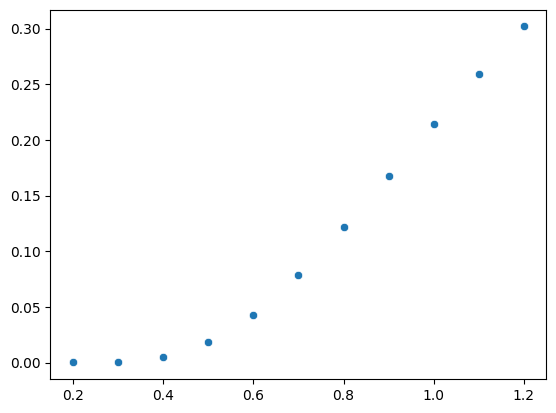

In [30]:
sns.scatterplot(x=a_list, y=wyniki_E)

Utworzenie listy wartości V - wykorzystywana także do późniejszych obliczeń

In [31]:
V_list = np.arange(10, 26, 1)
V_list

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

Wywołanie funkcji dla różnych wartości V oraz utworzenie wykresu logarytmicznego

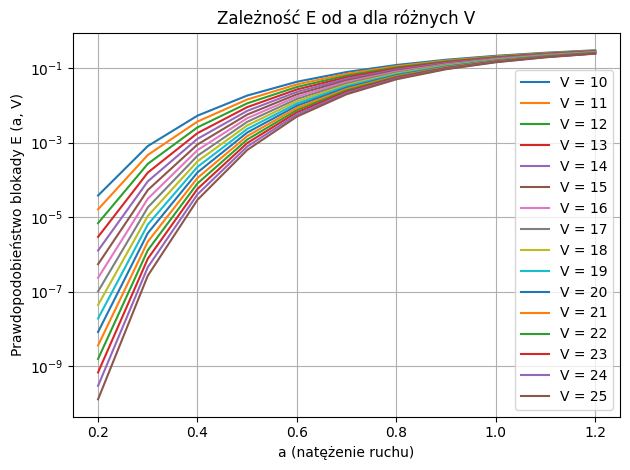

In [32]:
for V in V_list:
    wartosci_E = oblicz_E(a_list, V)
    plt.semilogy(a_list, wartosci_E, label=f'V = {V}')
plt.xlabel("a (natężenie ruchu)")
plt.ylabel("Prawdopodobieństwo blokady E (a, V)")
plt.title("Zależność E od a dla różnych V")
plt.legend()
plt.grid(True)
plt.tight_layout()


Funkcje do rekurencyjnego obliczania Prawdopodobieństawa Blokady i Strat modelu Erlanga

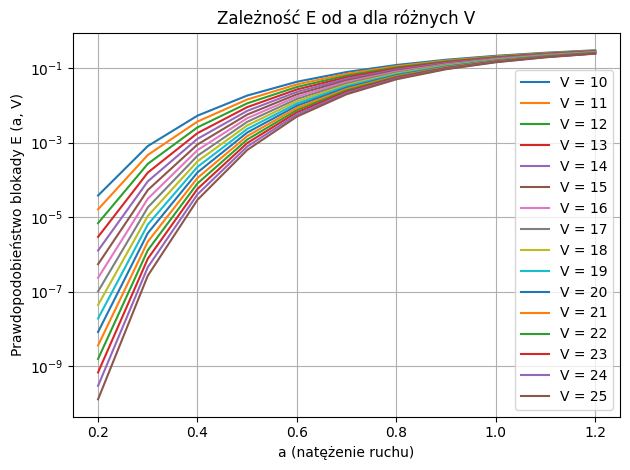

In [33]:
def oblicz_E_rekur(A, V):
    if V == 0:
        return 1
    else:
        rekur = oblicz_E_rekur(A, V - 1)
        licznik = A * rekur
        mianownik = V + A * rekur
        return licznik / mianownik


def lista_E_rekur(a_list, V):
    wyniki_E_rekur = []
    for a in a_list:
        A = a*V
        wyniki_E_rekur.append(oblicz_E_rekur(A, V))
    return wyniki_E_rekur

for V in V_list:
    wyniki_E_rekur = lista_E_rekur(a_list, V)
    plt.semilogy(a_list, wyniki_E_rekur, label=f'V = {V}')
plt.xlabel("a (natężenie ruchu)")
plt.ylabel("Prawdopodobieństwo blokady E (a, V)")
plt.title("Zależność E od a dla różnych V")
plt.legend()
plt.grid(True)
plt.tight_layout()

### Model Engseta
Prawdopodobieństwo blokady

In [34]:
def oblicz_E_engset(alpha_list, V, N):
    wyniki = []
    alpha_list1 = [(alpha*V)/N for alpha in alpha_list]
    alpha_final = [alpha/(1-alpha) for alpha in alpha_list1]
    for alpha in alpha_final:
        licznik = comb(N, V) * (alpha**V)
        mianownik = np.sum([comb(N, k) * (alpha**k) for k in range(V+1)])
        
        if mianownik == 0:
            wyniki.append(0.0)
        else:
            wyniki.append(licznik/mianownik)
    return wyniki

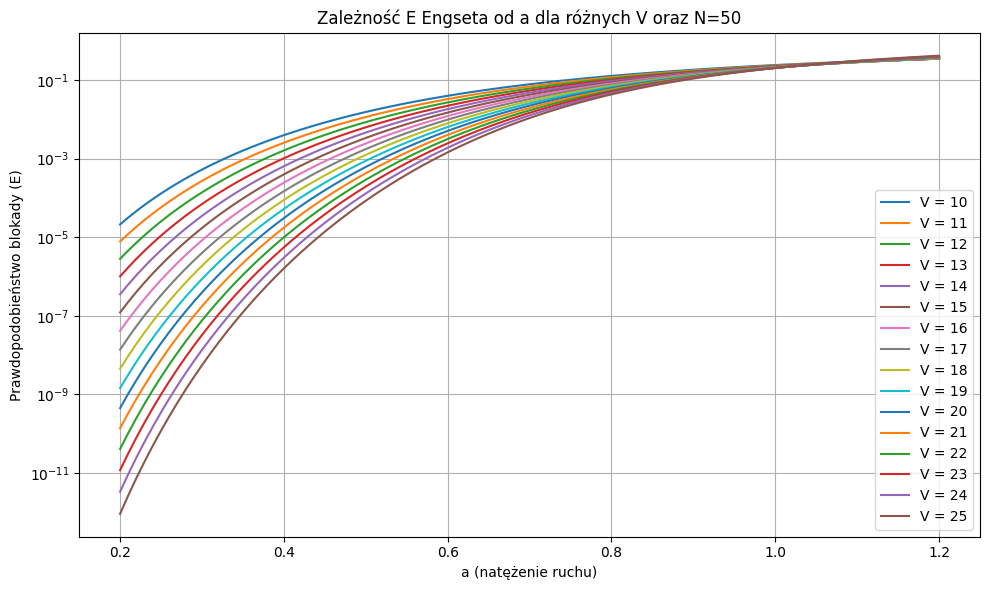

In [35]:
alpha_list = np.arange(0.2, 1.21, 0.01)
N = 50

plt.figure(figsize=(10, 6))
for v_val in V_list:
    wartosci_E_engset = oblicz_E_engset(alpha_list, v_val, N)
    plt.semilogy(alpha_list, wartosci_E_engset, label=f'V = {v_val}')

plt.xlabel("a (natężenie ruchu)")
plt.ylabel("Prawdopodobieństwo blokady (E)")
plt.title(f"Zależność E Engseta od a dla różnych V oraz N={N}")
plt.legend()
plt.grid(True)
plt.tight_layout()

Prawdopodobieństwo strat

In [36]:
def oblicz_B_engset(alpha_list, V, N):
    wyniki = []
    N_minus_1 = N-1
    alpha_list1 = [(alpha*V)/N for alpha in alpha_list]
    alpha_final = [alpha/(1-alpha) for alpha in alpha_list1]
    for alpha in alpha_final:
        licznik = comb(N_minus_1, V)*(alpha**V)
        mianownik = np.sum([comb(N_minus_1, k)*(alpha**k) for k in range(V+1)])
        
        if mianownik == 0:
            wyniki.append(0.0)
        else:
            wyniki.append(licznik/mianownik)
    return wyniki

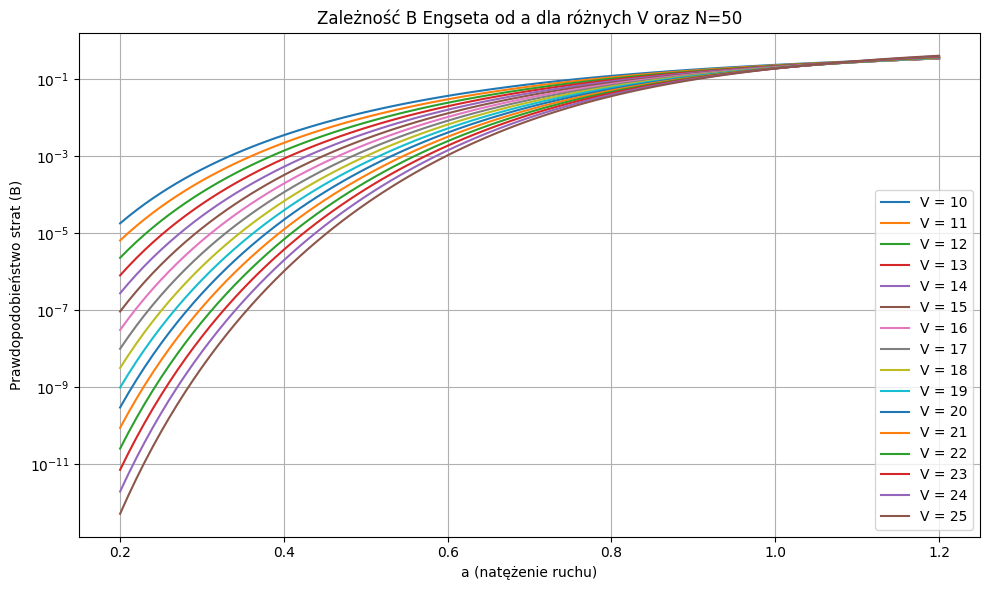

In [37]:
alpha_list = np.arange(0.2, 1.21, 0.01)
N = 50

plt.figure(figsize=(10, 6))
for v_val in V_list:
    wartosci_B_engset = oblicz_B_engset(alpha_list, v_val, N)
    plt.semilogy(alpha_list, wartosci_B_engset, label=f'V = {v_val}')

plt.xlabel("a (natężenie ruchu)")
plt.ylabel("Prawdopodobieństwo strat (B)")
plt.title(f"Zależność B Engseta od a dla różnych V oraz N={N}")
plt.legend()
plt.grid(True)
plt.tight_layout()

### Model Pascala
Prawdopodobieństwo blokady

In [38]:
def oblicz_E_pascal(beta_list, V, S):
    wyniki = []
    beta_list1 = [(beta*V)/S for beta in beta_list]
    beta_final = [beta/(1-beta) for beta in beta_list1]
    for beta in beta_final:
        licznik = comb(S+V-1, V) * (beta**V)
        mianownik = np.sum([comb(S+k-1, k) * (beta**k) for k in range(V+1)])
        
        if mianownik == 0:
            wyniki.append(0.0)
        else:
            wyniki.append(licznik/mianownik)
    return wyniki

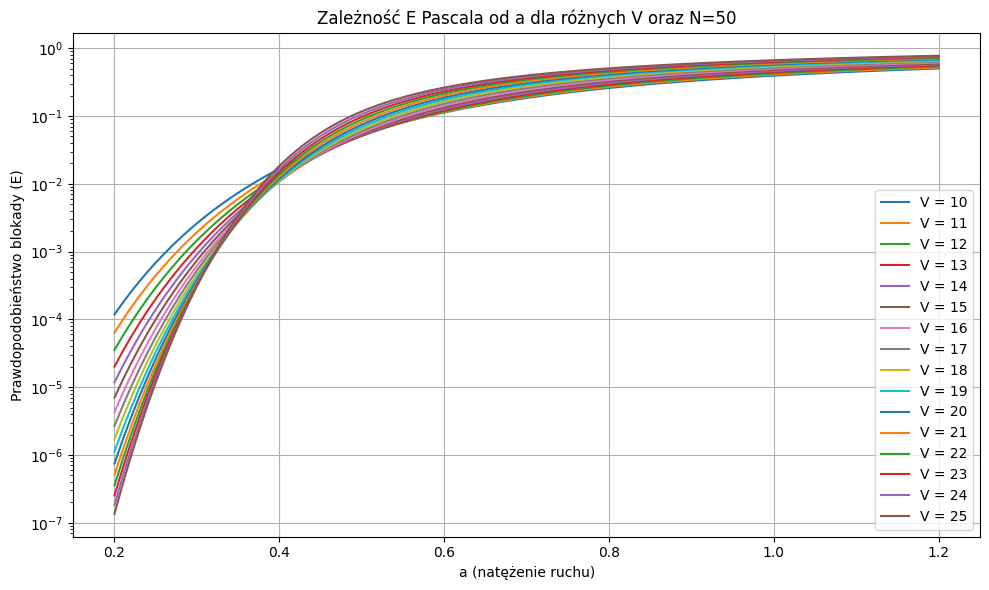

In [39]:
beta_list = np.arange(0.2, 1.21, 0.01)
S = 50

plt.figure(figsize=(10, 6))
for v_val in V_list:
    wartosci_E_pascal = oblicz_E_pascal(beta_list, v_val, S)
    plt.semilogy(beta_list, wartosci_E_pascal, label=f'V = {v_val}')

plt.xlabel("a (natężenie ruchu)")
plt.ylabel("Prawdopodobieństwo blokady (E)")
plt.title(f"Zależność E Pascala od a dla różnych V oraz N={N}")
plt.legend()
plt.grid(True)
plt.tight_layout()

Prawdopodobieństwo strat

In [40]:
def oblicz_B_pascal(beta_list, V, S):
    wyniki = []
    beta_list1 = [(beta*V)/S for beta in beta_list]
    beta_final = [beta/(1-beta) for beta in beta_list1]
    for beta in beta_final:
        licznik = comb(S+V, V)*(beta**V)
        mianownik = np.sum([comb(S+V, k)*(beta**k) for k in range(V+1)])
        
        if mianownik == 0:
            wyniki.append(0.0)
        else:
            wyniki.append(licznik/mianownik)
    return wyniki

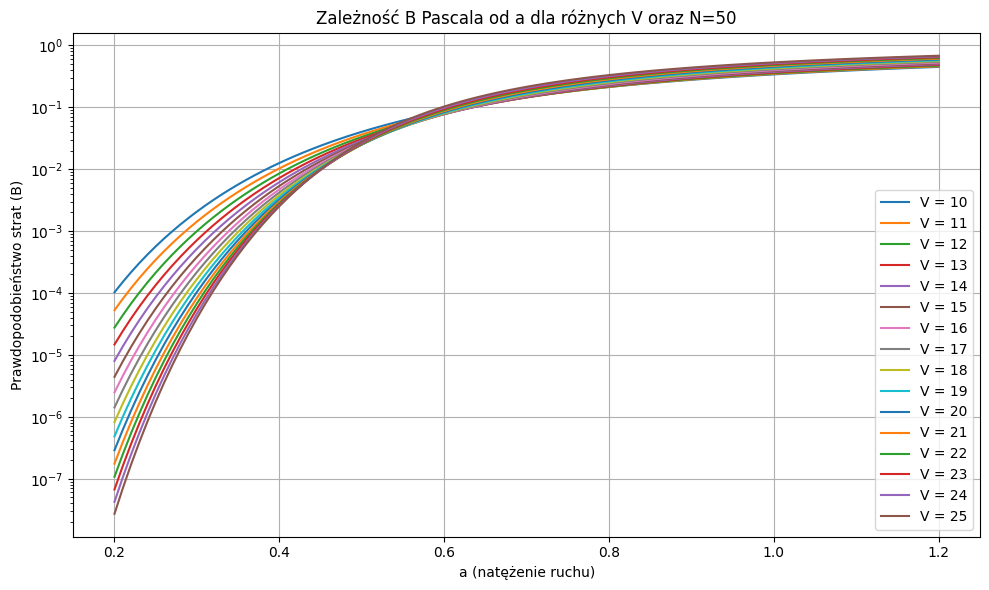

In [41]:
beta_list = np.arange(0.2, 1.21, 0.01)
S = 50

plt.figure(figsize=(10, 6))
for v_val in V_list:
    wartosci_B_pascal = oblicz_B_pascal(beta_list, v_val, S)
    plt.semilogy(beta_list, wartosci_B_pascal, label=f'V = {v_val}')

plt.xlabel("a (natężenie ruchu)")
plt.ylabel("Prawdopodobieństwo strat (B)")
plt.title(f"Zależność B Pascala od a dla różnych V oraz N={N}")
plt.legend()
plt.grid(True)
plt.tight_layout()